# Lecture 18
First we need to set up the notebook to draw the plots inline, and import some libraries:

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize

The following cell will just try to make the graphs look nicer.

In [57]:
try:
    import seaborn as sns
except ImportError:
    # This block will be run if there's an ImportError, i.e you don't have seaborn installed.
    sns = False
    print ("If you want to try different figure formatting, "
           "type 'conda install seaborn' at an anaconda command prompt or terminal. "
           "See https://stanford.edu/~mwaskom/software/seaborn/ for details")
    # If not using seaborn, we can still control the size of the figures this way
    from pylab import rcParams
    rcParams['figure.figsize'] = 6, 4
else:
    # This block will be run if there is no ImportError
    sns.set_style("ticks")
    sns.set_context("poster",rc={"figure.figsize": (8, 4)})

Unimolecular

$$-r_{{A.S}} =  \frac{k_1 C_t  C_A}{1 + K_A C_A + K_B C_B}$$

Langmuir-Hinshelwood
$$-r_{{A.S}} = k_s C_t^2 K_A K_B \frac{ C_A  C_B}{(1 + K_A C_A + K_B C_B + K_C C_C)^2}$$


Eley-Rideal
$$-r_{{A.S}}  = k_s C_t  K_A \frac{ C_A C_B}{1 + K_A C_A}$$

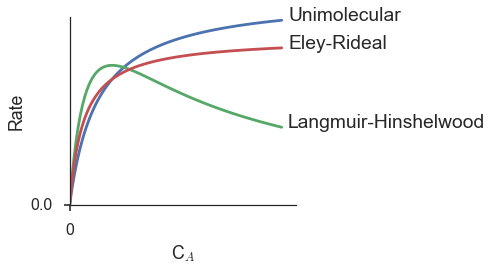

In [75]:
k1 = 1.
Ct = 1.
Cb = 1.
Ka = 10.
Kb = 1.

ax=plt.subplot(1,2,1)

Ca = np.linspace(0,1.5,100)
r_uni = k1*Ct*Ca / (1 + Ka*Ca + Kb*Cb)
plt.plot(Ca, r_uni, label='unimolecular')

k2 = 0.8
Kc = 1.
Cc = 1.
r_lh = k2*Ct*Ct*Ka*Kb*Ca*Cb/ ((1 + Ka*Ca + Kb*Cb + Kc*Cc)**2)
plt.plot(Ca, r_lh, label='Langmuir-Hinshelwood')

k3 = 0.08
r_er = k3*Ct*Ka*(Ca*Cb)/(1+Ka*Ca) 
plt.plot(Ca, r_er, label="Eley-Rideal")
#plt.legend(loc='best')

ax = plt.gca()

for values, label in ((r_uni, 'Unimolecular'),
                      (r_lh, 'Langmuir-Hinshelwood'),
                      (r_er, 'Eley-Rideal')):
    ax.annotate(label, xy=(Ca[-1],values[-1]), xytext=(Ca[-1]*1.03,values[-1]))

plt.ylabel('Rate')
plt.xlabel('C$_A$')
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(1))
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(1))
plt.tight_layout()
sns.despine()
plt.savefig('L18-figure.pdf')

